# Analysis in Progress

In [4]:
import pandas as pd

df = pd.read_json("results-in-progress.jsonl.gz", lines=True)
df["index.runtime_wallclock"] = df["index.runtime_wallclock"].apply(lambda i: int(i.split()[0]))
df["retrieval.runtime_wallclock"] = df["retrieval.runtime_wallclock"].apply(lambda i: int(i.split()[0]))


## Has the Retrieval Engine an impact on Efficiency?

In [6]:
df[['Retrieval', "index_1000.runtime_wallclock", "retrieval_per_query.runtime_wallclock"]].groupby("Retrieval").describe(percentiles=[0.5, .9, .99])

index_1000.runtime_wallclock                            \
                                             count         mean          std   
Retrieval                                                                      
duckdb                                        99.0    31.430901    15.814811   
kannolo                                       99.0   728.115107   267.150289   
naive-search                                  99.0     0.000000     0.000000   
pyterrier-naive                                9.0  4564.092491  5712.871248   
pyterrier-pisa                                 9.0   266.327855   144.495031   
pyterrier-splade                              99.0   334.540580    89.988560   
pyterrier-splade-pisa                         99.0   140.479421    45.771619   
seismic                                       99.0  1187.172513   534.963989   

                                                                           \
                              min          50%          90%           99%   
Retrieval                                                                   
duckdb                   2.801731    28.389123    52.161226     71.923584   
kannolo                108.676027   734.051767  1069.389426   1334.492593   
naive-search             0.000000     0.000000     0.000000      0.000000   
pyterrier-naive         96.130498  2035.533658  9900.162207  16568.329177   
pyterrier-pisa          51.053762   308.754642   410.501704    426.075197   
pyterrier-splade       115.874552   323.886509   465.874973    546.464660   
pyterrier-splade-pisa   20.203592   140.409961   196.826439    236.222505   
seismic                 56.065747  1113.898065  1771.911335   2978.420825   

                                    retrieval_per_query.runtime_wallclock  \
                                max                                 count   
Retrieval                                                                   
duckdb                    95.634737                                  99.0   
kannolo                 1472.041208                                  99.0   
naive-search               0.000000                                  99.0   
pyterrier-naive        17309.236618                                   9.0   
pyterrier-pisa           427.805585                                   9.0   
pyterrier-splade         677.423816                                  99.0   
pyterrier-splade-pisa    274.748068                                  99.0   
seismic                 3305.844122                                  99.0   

                                                                              \
                            mean        std        min        50%        90%   
Retrieval                                                                      
duckdb                 33.101725  49.030720   4.680000  11.600000  85.784000   
kannolo                 1.005146   0.341113   0.425926   0.906977   1.440000   
naive-search           22.739856  21.747167   2.348837  11.279070  58.260000   
pyterrier-naive        15.678505   2.771011  10.651163  15.820000  18.458667   
pyterrier-pisa          0.629515   0.279452   0.400000   0.541667   0.811416   
pyterrier-splade       32.392143  17.795744  15.320000  25.488372  51.858607   
pyterrier-splade-pisa  11.936966  19.463219   0.860000   4.425926  31.342833   
seismic                 1.221244   1.067531   0.139535   0.722222   2.808000   

                                               
                              99%         max  
Retrieval                                      
duckdb                 201.990112  274.730337  
kannolo                  2.020800    2.060000  
naive-search            74.976040   94.382022  
pyterrier-naive         19.245867   19.333333  
pyterrier-pisa           1.284512    1.337079  
pyterrier-splade        92.863596  124.168539  
pyterrier-splade-pisa  104.956404  132.550562  
seismic                  4.156724    5.780000

In [10]:
df[['Retrieval', "index.energy_total", "retrieval.energy_total"]].groupby("Retrieval").describe(percentiles=[0.5, .9, .99])

index.energy_total                                    \
                                   count       mean         std  min   50%   
Retrieval                                                                    
duckdb                              99.0   0.282828    0.474673  0.0   0.0   
kannolo                             99.0  12.434343    7.469887  1.0  11.0   
naive-search                        99.0   0.000000    0.000000  0.0   0.0   
pyterrier-naive                      9.0  86.777778  138.388744  1.0  30.0   
pyterrier-pisa                       9.0   5.222222    4.493823  0.0   4.0   
pyterrier-splade                    99.0   5.131313    2.562072  0.0   5.0   
pyterrier-splade-pisa               99.0   2.191919    1.440499  0.0   2.0   
seismic                             99.0  19.070707   10.741159  0.0  19.0   

                                            retrieval.energy_total            \
                         90%     99%    max                  count      mean   
Retrieval                                                                      
duckdb                   1.0    1.02    2.0                   99.0  0.222222   
kannolo                 22.2   29.08   33.0                   99.0  0.000000   
naive-search             0.0    0.00    0.0                   99.0  0.070707   
pyterrier-naive        201.8  409.88  433.0                    9.0  0.000000   
pyterrier-pisa          10.0   13.60   14.0                    9.0  0.000000   
pyterrier-splade         9.0   11.04   13.0                   99.0  0.080808   
pyterrier-splade-pisa    4.0    6.00    6.0                   99.0  0.040404   
seismic                 33.2   45.08   49.0                   99.0  0.000000   

                                                           
                            std  min  50%  90%   99%  max  
Retrieval                                                  
duckdb                 0.736173  0.0  0.0  1.0  4.02  5.0  
kannolo                0.000000  0.0  0.0  0.0  0.00  0.0  
naive-search           0.294595  0.0  0.0  0.0  1.02  2.0  
pyterrier-naive        0.000000  0.0  0.0  0.0  0.00  0.0  
pyterrier-pisa         0.000000  0.0  0.0  0.0  0.00  0.0  
pyterrier-splade       0.395814  0.0  0.0  0.0  2.02  3.0  
pyterrier-splade-pisa  0.244081  0.0  0.0  0.0  1.02  2.0  
seismic                0.000000  0.0  0.0  0.0  0.00  0.0

,Retrieval,index.energy_total,retrieval.energy_total
0,duckdb,0.282828,0.222222
1,kannolo,12.434343,0.000000
2,naive-search,0.000000,0.070707
3,pyterrier-naive,86.777778,0.000000
4,pyterrier-pisa,5.222222,0.000000
5,pyterrier-splade,5.131313,0.080808
6,pyterrier-splade-pisa,2.191919,0.040404
7,seismic,19.070707,0.000000


In [39]:
def fill(f, cnt):
    for _ in range(cnt-len(f)):
        f = '\\phantom{0}' + f
    return f

def rows_efficiency_table():
    df_copy = df.copy()
    df_copy["index.runtime_wallclock"] = df_copy["index_1000.runtime_wallclock"]
    df_copy["retrieval.runtime_wallclock"] = df_copy["retrieval_per_query.runtime_wallclock"]
    df_runtime = df_copy[['Retrieval', "index.runtime_wallclock", "retrieval.runtime_wallclock"]].groupby("Retrieval").describe(percentiles=[0.5, .9, .99])
    ret = {}

    for k, k_df in [('runtime_wallclock', df_runtime)]:
        aggr = {}
        for _, i in k_df.reset_index().iterrows():
            def val(percentile, field):
                v = i[(f'{field}.{k}', f'{percentile}%')]
                return fill("{:.1f}".format(v), 7)

            aggr[i[('Retrieval', '')]] = {
                "index":  ' & '.join([val(p, 'index') for p in ["50", "90", "99"]]),
                "retrieval":  ' & '.join([val(p, 'retrieval') for p in ["50", "90", "99"]])
            }
        
        ret[k] = aggr

    means = {}
    sums = {}
    for _, i in df[['Retrieval', "index.energy_total", "retrieval.energy_total"]].groupby(["Retrieval"]).mean().reset_index().iterrows():
        means[i["Retrieval"]] = i.to_dict()

    for _, i in df[['Retrieval', "index.energy_total", "retrieval.energy_total"]].groupby(["Retrieval"]).sum().reset_index().iterrows():
        sums[i["Retrieval"]] = i.to_dict()


    def report(approach):
        indx = sums[approach]["index.energy_total"]
        if approach not in ('pyterrier-pisa', 'pyterrier-naive'):
            indx = indx/11

        return ' & '.join([ret["runtime_wallclock"][approach]["index"], ret["runtime_wallclock"][approach]["retrieval"], fill("{:.1f}".format(means[approach]["index.energy_total"]), 5), fill("{:.1f}".format(indx), 5), "{:.1f}".format(means[approach]["retrieval.energy_total"]), fill("{:.1f}".format(sums[approach]["retrieval.energy_total"]), 4)])

    return f"""\\midrule
DuckDB & {report('duckdb')} \\\\
kANNolo & {report('kannolo')} \\\\
Na""" + "{\\\"i}" + f"""ve & {report('naive-search')} \\\\

PISA & {report('pyterrier-splade-pisa')} \\\\
PyTerrier & {report('pyterrier-splade')} \\\\
Seismic & {report('seismic')} \\\\

\\midrule

BM25@PyTerrier & {report('pyterrier-naive')} \\\\
BM25@PISA & {report('pyterrier-pisa')} \\\\"""

print(rows_efficiency_table())

\midrule
DuckDB & \phantom{0}\phantom{0}\phantom{0}28.4 & \phantom{0}\phantom{0}\phantom{0}52.2 & \phantom{0}\phantom{0}\phantom{0}71.9 & \phantom{0}\phantom{0}\phantom{0}11.6 & \phantom{0}\phantom{0}\phantom{0}85.8 & \phantom{0}\phantom{0}202.0 & \phantom{0}\phantom{0}0.3 & \phantom{0}\phantom{0}2.5 & 0.2 & 22.0 \\
kANNolo & \phantom{0}\phantom{0}734.1 & \phantom{0}1069.4 & \phantom{0}1334.5 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}0.9 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}1.4 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}2.0 & \phantom{0}12.4 & 111.9 & 0.0 & \phantom{0}0.0 \\
Na{\"i}ve & \phantom{0}\phantom{0}\phantom{0}\phantom{0}0.0 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}0.0 & \phantom{0}\phantom{0}\phantom{0}\phantom{0}0.0 & \phantom{0}\phantom{0}\phantom{0}11.3 & \phantom{0}\phantom{0}\phantom{0}58.3 & \phantom{0}\phantom{0}\phantom{0}75.0 & \phantom{0}\phantom{0}0.0 & \phantom{0}\phantom{0}0.0 & 0.1 & \phantom{0}7.0 \\

PISA & \phantom{0}\phantom{0}140.4 & \p

## Has the Retrieval Engine an impact on Effectiveness?

In [40]:
df[['Retrieval', "nDCG@10", "P@5"]].groupby("Retrieval").describe()

nDCG@10                                          \
                        count      mean       std       min       25%   
Retrieval                                                               
duckdb                   99.0  0.396967  0.201194  0.091950  0.210688   
kannolo                  99.0  0.390138  0.191988  0.094183  0.211004   
naive-search             99.0  0.396901  0.201167  0.092292  0.210186   
pyterrier-naive           9.0  0.280036  0.181155  0.050402  0.079050   
pyterrier-pisa            9.0  0.269944  0.183209  0.038302  0.071597   
pyterrier-splade         99.0  0.396762  0.200967  0.091947  0.212084   
pyterrier-splade-pisa    99.0  0.396853  0.200995  0.091947  0.212160   
seismic                  99.0  0.397130  0.201005  0.093899  0.210541   

                                                      P@5                      \
                            50%       75%       max count      mean       std   
Retrieval                                                                       
duckdb                 0.370811  0.488476  0.770543  99.0  0.501208  0.224178   
kannolo                0.369019  0.480275  0.740801  99.0  0.496959  0.217695   
naive-search           0.370243  0.488706  0.770543  99.0  0.501088  0.224062   
pyterrier-naive        0.257093  0.444770  0.496040   9.0  0.360292  0.221173   
pyterrier-pisa         0.245212  0.412778  0.483166   9.0  0.351201  0.228784   
pyterrier-splade       0.369118  0.486919  0.770630  99.0  0.500790  0.223691   
pyterrier-splade-pisa  0.369118  0.488924  0.770630  99.0  0.501073  0.223623   
seismic                0.368221  0.489415  0.770543  99.0  0.501442  0.223955   

                                                                         
                            min       25%       50%       75%       max  
Retrieval                                                                
duckdb                 0.150000  0.300000  0.476404  0.630000  0.906977  
kannolo                0.154167  0.302000  0.472000  0.623483  0.883721  
naive-search           0.154167  0.300000  0.476404  0.628000  0.906977  
pyterrier-naive        0.092000  0.133333  0.391011  0.568000  0.629630  
pyterrier-pisa         0.064000  0.120000  0.391011  0.548000  0.627907  
pyterrier-splade       0.150000  0.302000  0.476000  0.629730  0.906977  
pyterrier-splade-pisa  0.150000  0.302000  0.476000  0.629730  0.906977  
seismic                0.154167  0.300000  0.476404  0.628000  0.906977

In [ ]:
df[['Retrieval', "nDCG@10", "P@5", "ir-dataset-id"]].groupby(['Retrieval', "ir-dataset-id"]).aggregate({"nDCG@10": "mean", "P@5": "mean"}).reset_index()

,Retrieval,ir-dataset-id,nDCG@10,P@5
0,duckdb,clueweb09/en/trec-web-2009,0.198420,0.281455
1,duckdb,clueweb09/en/trec-web-2010,0.200144,0.292045
2,duckdb,clueweb09/en/trec-web-2011,0.295880,0.349818
3,duckdb,clueweb09/en/trec-web-2012,0.163501,0.258909
4,duckdb,clueweb12/b13/trec-misinfo-2019,0.477155,0.602545
...,...,...,...,...
67,seismic,clueweb12/b13/trec-misinfo-2019,0.477470,0.603636
68,seismic,disks45/nocr/trec-robust-2004/fold1,0.430942,0.469091
69,seismic,msmarco-passage/trec-dl-2019/judged,0.726450,0.868076
70,seismic,msmarco-passage/trec-dl-2020/judged,0.699742,0.833333


In [ ]:
def df_for_eval_embeddings():
    ret = df.copy()
    ret = ret[['embedding/model', "nDCG@10", "P@5", "ir-dataset-id"]].groupby(['embedding/model', "ir-dataset-id"]).aggregate({"nDCG@10": "mean", "P@5": "mean"}).reset_index()
    ret["corpus"] = ret["ir-dataset-id"].apply(lambda i: i.split("/")[0])
    return ret

def df_for_lexical_embeddings():
    ret = df.copy()
    ret = ret[['Retrieval', "nDCG@10", "P@5", "ir-dataset-id"]].groupby(['Retrieval', "ir-dataset-id"]).aggregate({"nDCG@10": "mean", "P@5": "mean"}).reset_index()
    ret["corpus"] = ret["ir-dataset-id"].apply(lambda i: i.split("/")[0])
    return ret

MODEL_TO_FULL_NAME = {
    'UniCoil': 'castorini/unicoil-noexp-msmarco-passage',
    'Splade':'webis/splade',
    'Splade2 Dist.': 'naver/splade_v2_distil',
    'Splade3': 'naver/splade-v3',
    'Splade3 Dist.': 'naver/splade-v3-distilbert',
    'Splade3 Doc': 'naver/splade-v3-doc',
    'Splade3 Lex': 'naver/splade-v3-lexical',
    'OS2 Dist.': 'opensearch-project/opensearch-neural-sparse-encoding-v2-distill',
    'OS2 Doc': 'opensearch-project/opensearch-neural-sparse-encoding-doc-v2-distill',
    'OS2 Mini': 'opensearch-project/opensearch-neural-sparse-encoding-doc-v2-mini',
    'OS3 Dist.': 'opensearch-project/opensearch-neural-sparse-encoding-doc-v3-distill',
}

MODEL_TO_ENERGY = {}
for _, i in df[['embedding/model', "embedding/query.energy_total", "embedding/doc.energy_total"]].groupby("embedding/model").mean().reset_index().iterrows():
    MODEL_TO_ENERGY[i["embedding/model"]] = i.to_dict()

def effectiveness_line(model):
    ret = []
    df_for_eval = df_for_eval_embeddings()
    df_for_eval = df_for_eval[df_for_eval["embedding/model"] == MODEL_TO_FULL_NAME[model]]

    for measure in ["nDCG@10", "P@5"]:
        for corpus in ['clueweb09', 'clueweb12', 'msmarco-passage', 'disks45', 'msmarco-segment-v2.1']:
            ret += [df_for_eval[df_for_eval["corpus"] == corpus][measure].mean()]
        ret += [df_for_eval[measure].mean()]


    return str(int(MODEL_TO_ENERGY[MODEL_TO_FULL_NAME[model]]["embedding/doc.energy_total"])) + " & " + (" & ".join(["{:.2f}".format(i).replace("0.", ".") for i in ret]) +" \\\\")

def rows_effectivness_table():
    print("\\midrule")
    for k in sorted(MODEL_TO_FULL_NAME.keys()):
        print(k, "&", effectiveness_line(k))
    
    print("\\midrule")

    for model, name in [("pyterrier-naive", "BM25 PyTerrier"), ("pyterrier-pisa", "BM25 PISA")]:
        df_for_eval = df_for_lexical_embeddings()
        df_for_eval = df_for_eval[df_for_eval["Retrieval"] == model]
        ret = []
        for measure in ["nDCG@10", "P@5"]:
            for corpus in ['clueweb09', 'clueweb12', 'msmarco-passage', 'disks45', 'msmarco-segment-v2.1']:
                ret += [df_for_eval[df_for_eval["corpus"] == corpus][measure].mean()]
            ret += [df_for_eval[measure].mean()]
        
        print("\\multicolumn{2}{@{}l}{" + name + "} & " + (" & ".join(["{:.2f}".format(i).replace("0.", ".") for i in ret]) +" \\\\"))

rows_effectivness_table()

\midrule
OS2 Dist. & 45205 & .24 & .49 & .72 & .48 & .43 & .42 & .34 & .64 & .88 & .52 & .62 & .54 \\
OS2 Doc & 45140 & .23 & .49 & .69 & .44 & .37 & .40 & .32 & .61 & .83 & .48 & .55 & .51 \\
OS2 Mini & 31445 & .23 & .48 & .69 & .41 & .35 & .39 & .32 & .63 & .83 & .45 & .52 & .50 \\
OS3 Dist. & 46663 & .24 & .49 & .70 & .42 & .37 & .41 & .31 & .63 & .84 & .47 & .53 & .51 \\
Splade & 42505 & .22 & .47 & .74 & .44 & .42 & .41 & .31 & .60 & .86 & .48 & .60 & .52 \\
Splade2 Dist. & 45132 & .21 & .48 & .72 & .46 & .37 & .40 & .28 & .60 & .86 & .51 & .53 & .50 \\
Splade3 & 68116 & .22 & .48 & .74 & .46 & .44 & .42 & .30 & .61 & .88 & .50 & .63 & .52 \\
Splade3 Dist. & 45239 & .23 & .47 & .75 & .46 & .39 & .41 & .32 & .60 & .89 & .49 & .59 & .53 \\
Splade3 Doc & 68217 & .16 & .45 & .71 & .37 & .32 & .36 & .21 & .54 & .84 & .41 & .48 & .44 \\
Splade3 Lex & 67851 & .21 & .48 & .73 & .44 & .39 & .40 & .28 & .62 & .87 & .46 & .57 & .50 \\
UniCoil & 54712 & .18 & .44 & .61 & .34 & .32 & .34 & .25

In [61]:
df_for_eval_embeddings()["corpus"].unique()

array(['clueweb09', 'clueweb12', 'disks45', 'msmarco-passage',
       'msmarco-segment-v2.1'], dtype=object)

In [49]:
df_for_eval_embeddings()["embedding/model"].unique()

array(['castorini/unicoil-noexp-msmarco-passage', 'naver/splade-v3',
       'naver/splade-v3-distilbert', 'naver/splade-v3-doc',
       'naver/splade-v3-lexical', 'naver/splade_v2_distil',
       'opensearch-project/opensearch-neural-sparse-encoding-doc-v2-distill',
       'opensearch-project/opensearch-neural-sparse-encoding-doc-v2-mini',
       'opensearch-project/opensearch-neural-sparse-encoding-doc-v3-distill',
       'opensearch-project/opensearch-neural-sparse-encoding-v2-distill',
       'webis/splade'], dtype=object)

In [72]:
df[['embedding/model', "embedding/query.energy_total", "embedding/doc.energy_total"]].groupby("embedding/model").median().reset_index()

,embedding/model,embedding/query.energy_total,embedding/doc.energy_total
0,castorini/unicoil-noexp-msmarco-passage,117.0,47896.0
1,naver/splade-v3,115.5,60831.0
2,naver/splade-v3-distilbert,94.0,40447.0
3,naver/splade-v3-doc,92.0,59716.0
4,naver/splade-v3-lexical,123.0,59938.0
5,naver/splade_v2_distil,93.0,40492.0
6,opensearch-project/opensearch-neural-sparse-en...,77.0,40184.0
7,opensearch-project/opensearch-neural-sparse-en...,60.0,28399.0
8,opensearch-project/opensearch-neural-sparse-en...,77.0,40980.0
9,opensearch-project/opensearch-neural-sparse-en...,94.0,40687.0


## Has the Embedding Model an impact on Effectiveness?

In [ ]:
df[['embedding/model', "nDCG@10", "P@5"]].groupby("embedding/model").describe()

nDCG@10            \
                                                     count      mean   
embedding/model                                                        
castorini/unicoil-noexp-msmarco-passage               54.0  0.336938   
naver/splade-v3                                       54.0  0.418641   
naver/splade-v3-distilbert                            54.0  0.413938   
naver/splade-v3-doc                                   54.0  0.355009   
naver/splade-v3-lexical                               54.0  0.400617   
naver/splade_v2_distil                                54.0  0.397243   
opensearch-project/opensearch-neural-sparse-enc...    54.0  0.401273   
opensearch-project/opensearch-neural-sparse-enc...    54.0  0.392769   
opensearch-project/opensearch-neural-sparse-enc...    54.0  0.405616   
opensearch-project/opensearch-neural-sparse-enc...    54.0  0.420997   
webis/splade                                          54.0  0.410670   

                                                                        \
                                                         std       min   
embedding/model                                                          
castorini/unicoil-noexp-msmarco-passage             0.175053  0.137075   
naver/splade-v3                                     0.206895  0.178779   
naver/splade-v3-distilbert                          0.207162  0.169488   
naver/splade-v3-doc                                 0.222159  0.091947   
naver/splade-v3-lexical                             0.208757  0.140202   
naver/splade_v2_distil                              0.208654  0.155352   
opensearch-project/opensearch-neural-sparse-enc...  0.184013  0.176687   
opensearch-project/opensearch-neural-sparse-enc...  0.184748  0.169167   
opensearch-project/opensearch-neural-sparse-enc...  0.186389  0.178365   
opensearch-project/opensearch-neural-sparse-enc...  0.192319  0.195342   
webis/splade                                        0.205686  0.174217   

                                                                        \
                                                         25%       50%   
embedding/model                                                          
castorini/unicoil-noexp-msmarco-passage             0.163441  0.318659   
naver/splade-v3                                     0.227291  0.436828   
naver/splade-v3-distilbert                          0.209756  0.392961   
naver/splade-v3-doc                                 0.177253  0.322928   
naver/splade-v3-lexical                             0.195219  0.394152   
naver/splade_v2_distil                              0.179756  0.368275   
opensearch-project/opensearch-neural-sparse-enc...  0.236187  0.374330   
opensearch-project/opensearch-neural-sparse-enc...  0.211211  0.354978   
opensearch-project/opensearch-neural-sparse-enc...  0.228665  0.370243   
opensearch-project/opensearch-neural-sparse-enc...  0.248265  0.427653   
webis/splade                                        0.216541  0.415191   

                                                                         P@5  \
                                                         75%       max count   
embedding/model                                                                
castorini/unicoil-noexp-msmarco-passage             0.439803  0.619936  54.0   
naver/splade-v3                                     0.485493  0.751233  54.0   
naver/splade-v3-distilbert                          0.473836  0.755294  54.0   
naver/splade-v3-doc                                 0.450264  0.723305  54.0   
naver/splade-v3-lexical                             0.485002  0.738007  54.0   
naver/splade_v2_distil                              0.481676  0.744197  54.0   
opensearch-project/opensearch-neural-sparse-enc...  0.492357  0.719355  54.0   
opensearch-project/opensearch-neural-sparse-enc...  0.484629  0.712275  54.0   
opensearch-project/opensearch-neural-sparse-enc...  0.492417  0.726587  54.0   
opensear

## Has the Embedding Model an impact on Efficiency?

In [92]:
df[['embedding/model', "index_1000.runtime_wallclock", "retrieval_per_query.runtime_wallclock"]].groupby("embedding/model").describe(percentiles=[0.5, .9, .99])

index_1000.runtime_wallclock  \
                                                                          count   
embedding/model                                                                   
castorini/unicoil-noexp-msmarco-passage                                    54.0   
naver/splade-v3                                                            54.0   
naver/splade-v3-distilbert                                                 54.0   
naver/splade-v3-doc                                                        54.0   
naver/splade-v3-lexical                                                    54.0   
naver/splade_v2_distil                                                     54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
webis/splade                                                               54.0   

                                                                            \
                                                          mean         std   
embedding/model                                                              
castorini/unicoil-noexp-msmarco-passage             221.540088  267.666894   
naver/splade-v3                                     412.910879  478.930756   
naver/splade-v3-distilbert                          455.213892  527.998968   
naver/splade-v3-doc                                 364.113231  409.062553   
naver/splade-v3-lexical                             493.286247  609.889254   
naver/splade_v2_distil                              564.899676  694.013615   
opensearch-project/opensearch-neural-sparse-enc...  337.033102  411.457893   
opensearch-project/opensearch-neural-sparse-enc...  445.710623  546.039367   
opensearch-project/opensearch-neural-sparse-enc...  314.239015  337.613251   
opensearch-project/opensearch-neural-sparse-enc...  370.089567  411.835265   
webis/splade                                        460.817636  530.718420   

                                                                     \
                                                    min         50%   
embedding/model                                                       
castorini/unicoil-noexp-msmarco-passage             0.0   97.285388   
naver/splade-v3                                     0.0  212.721877   
naver/splade-v3-distilbert                          0.0  241.391542   
naver/splade-v3-doc                                 0.0  222.287984   
naver/splade-v3-lexical                             0.0  252.027381   
naver/splade_v2_distil                              0.0  284.096733   
opensearch-project/opensearch-neural-sparse-enc...  0.0  181.545616   
opensearch-project/opensearch-neural-sparse-enc...  0.0  247.397401   
opensearch-project/opensearch-neural-sparse-enc...  0.0  198.250749   
opensearch-project/opensearch-neural-sparse-enc...  0.0  221.002812   
webis/splade                                        0.0  223.622487   

                                                                              \
                                                            90%          99%   
embedding/model                                                                
castorini/unicoil-noexp-msmarco-passage              655.659444   851.338111   
naver/splade-v3                                     1169.751611  1718.981982   
naver/splade-v3-distilbert                          1269.391362  1870.257059   
naver/splade-v3-doc                                  974.588961  1488.031163   
naver/splade-v3-lexical                             1343.253297  2310.386831   
naver/splade_v2_distil                              1672.172999  2618.534077   
opensearch-project/opensearch-neural-sparse-enc...   991.516365  1512.969365   


In [93]:
df[['embedding/model', "index_1000.runtime_wallclock", "retrieval_per_query.runtime_wallclock"]].groupby("embedding/model").describe(percentiles=[0.5, .9, .99]).reset_index()

embedding/model  \
                                                        
0             castorini/unicoil-noexp-msmarco-passage   
1                                     naver/splade-v3   
2                          naver/splade-v3-distilbert   
3                                 naver/splade-v3-doc   
4                             naver/splade-v3-lexical   
5                              naver/splade_v2_distil   
6   opensearch-project/opensearch-neural-sparse-en...   
7   opensearch-project/opensearch-neural-sparse-en...   
8   opensearch-project/opensearch-neural-sparse-en...   
9   opensearch-project/opensearch-neural-sparse-en...   
10                                       webis/splade   

   index_1000.runtime_wallclock                                           \
                          count        mean         std  min         50%   
0                          54.0  221.540088  267.666894  0.0   97.285388   
1                          54.0  412.910879  478.930756  0.0  212.721877   
2                          54.0  455.213892  527.998968  0.0  241.391542   
3                          54.0  364.113231  409.062553  0.0  222.287984   
4                          54.0  493.286247  609.889254  0.0  252.027381   
5                          54.0  564.899676  694.013615  0.0  284.096733   
6                          54.0  337.033102  411.457893  0.0  181.545616   
7                          54.0  445.710623  546.039367  0.0  247.397401   
8                          54.0  314.239015  337.613251  0.0  198.250749   
9                          54.0  370.089567  411.835265  0.0  221.002812   
10                         54.0  460.817636  530.718420  0.0  223.622487   

                                           \
            90%          99%          max   
0    655.659444   851.338111   862.249605   
1   1169.751611  1718.981982  1949.682817   
2   1269.391362  1870.257059  2177.052184   
3    974.588961  1488.031163  1757.938223   
4   1343.253297  2310.386831  2971.738717   
5   1672.172999  2618.534077  3305.844122   
6    991.516365  1512.969365  1967.279139   
7   1251.964090  2030.649653  2741.206160   
8    889.130520  1138.232451  1276.770435   
9   1032.227725  1414.873447  1727.602717   
10  1316.367904  1723.971336  2041.553593   

   retrieval_per_query.runtime_wallclock                                  \
                                   count       mean        std       min   
0                                   54.0   9.163285  11.183302  0.139535   
1                                   54.0  16.830156  17.613463  0.488372   
2                                   54.0  17.250564  19.021450  0.651163   
3                                   54.0   7.015942   8.363729  0.395349   
4                                   54.0   7.034048   8.222217  0.348837   
5                                   54.0  27.002500  26.685433  0.697674   
6                                   54.0   7.164915   8.412472  0.255814   
7                                   54.0   7.320853   8.245277  0.279070   
8                                   54.0   7.124808   7.805883  0.320000   
9                                   54.0  37.047144  43.800648  0.700000   
10                                  54.0  44.773766  54.461798  0.648148   

                                                   
          50%         90%         99%         max  
0    2.960000   28.332465   38.872825   43.921348  
1   10.282593   39.540000   64.051943   74.494382  
2    9.579457   43.906000   69.035090   69.100000  
3    4.625581   20.528444   28.608921   30.370787  
4    3.893520   22.348989   27.408163   29.573034  
5   20.147442   62.517933   97.825169  101.707865  
6    4.380000   23.314000   28.142009   32.629213  
7    4.402963   21.090000   29.513623   34.707865  
8    4.459302   21.788000   24.511656   24.629213  
9   29.130000   87.026157  179.192224  200.505618  
10  33.770000  116.185978  227.482425  274.730337

In [104]:
def model_efficiency_line(model):
    tmp = df[['embedding/model', "index_1000.runtime_wallclock", "retrieval_per_query.runtime_wallclock"]].groupby("embedding/model").describe(percentiles=[0.5, .9, .99])
    for _, i in tmp.iterrows():
        if i.name == MODEL_TO_FULL_NAME[model]:
            ret = []
            for k in ['index_1000.runtime_wallclock', 'retrieval_per_query.runtime_wallclock']:
                for p in ["50%", "90%", "99%"]:
                    ret += [i[(k, p)]]

            return ' & '.join([fill("{:.1f}".format(i), 6) for i in ret]) + ' \\\\'
    raise ValueError()
    


def rows_model_efficiency_table():
    print("\\midrule")
    for k in sorted(MODEL_TO_FULL_NAME.keys()):
        print(k, "&", model_efficiency_line(k))

rows_model_efficiency_table()

\midrule
OS2 Dist. & \phantom{0}221.0 & 1032.2 & 1414.9 & \phantom{0}\phantom{0}29.1 & \phantom{0}\phantom{0}87.0 & \phantom{0}179.2 \\
OS2 Doc & \phantom{0}181.5 & \phantom{0}991.5 & 1513.0 & \phantom{0}\phantom{0}\phantom{0}4.4 & \phantom{0}\phantom{0}23.3 & \phantom{0}\phantom{0}28.1 \\
OS2 Mini & \phantom{0}247.4 & 1252.0 & 2030.6 & \phantom{0}\phantom{0}\phantom{0}4.4 & \phantom{0}\phantom{0}21.1 & \phantom{0}\phantom{0}29.5 \\
OS3 Dist. & \phantom{0}198.3 & \phantom{0}889.1 & 1138.2 & \phantom{0}\phantom{0}\phantom{0}4.5 & \phantom{0}\phantom{0}21.8 & \phantom{0}\phantom{0}24.5 \\
Splade & \phantom{0}223.6 & 1316.4 & 1724.0 & \phantom{0}\phantom{0}33.8 & \phantom{0}116.2 & \phantom{0}227.5 \\
Splade2 Dist. & \phantom{0}284.1 & 1672.2 & 2618.5 & \phantom{0}\phantom{0}20.1 & \phantom{0}\phantom{0}62.5 & \phantom{0}\phantom{0}97.8 \\
Splade3 & \phantom{0}212.7 & 1169.8 & 1719.0 & \phantom{0}\phantom{0}10.3 & \phantom{0}\phantom{0}39.5 & \phantom{0}\phantom{0}64.1 \\
Splade3 Dist. & 

In [ ]:
df[['embedding/model', "embedding/query.energy_total", "embedding/doc.energy_total"]].groupby("embedding/model").describe()

embedding/query.energy_total  \
                                                                          count   
embedding/model                                                                   
castorini/unicoil-noexp-msmarco-passage                                    54.0   
naver/splade-v3                                                            54.0   
naver/splade-v3-distilbert                                                 54.0   
naver/splade-v3-doc                                                        54.0   
naver/splade-v3-lexical                                                    54.0   
naver/splade_v2_distil                                                     54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
opensearch-project/opensearch-neural-sparse-enc...                         54.0   
webis/splade                                                               54.0   

                                                                          \
                                                          mean       std   
embedding/model                                                            
castorini/unicoil-noexp-msmarco-passage             120.444444  7.311574   
naver/splade-v3                                     116.555556  8.304731   
naver/splade-v3-distilbert                           96.000000  5.298629   
naver/splade-v3-doc                                  93.666667  8.498613   
naver/splade-v3-lexical                             124.444444  8.020414   
naver/splade_v2_distil                               93.777778  3.553721   
opensearch-project/opensearch-neural-sparse-enc...   76.000000  3.528857   
opensearch-project/opensearch-neural-sparse-enc...   60.222222  7.858817   
opensearch-project/opensearch-neural-sparse-enc...   76.055556  5.841997   
opensearch-project/opensearch-neural-sparse-enc...   95.888889  4.648662   
webis/splade                                        118.055556  8.738155   

                                                                         \
                                                      min    25%    50%   
embedding/model                                                           
castorini/unicoil-noexp-msmarco-passage             114.0  116.0  117.0   
naver/splade-v3                                     106.0  111.0  115.5   
naver/splade-v3-distilbert                           92.0   94.0   94.0   
naver/splade-v3-doc                                  83.0   91.0   92.0   
naver/splade-v3-lexical                             118.0  118.0  123.0   
naver/splade_v2_distil                               89.0   92.0   93.0   
opensearch-project/opensearch-neural-sparse-enc...   71.0   72.0   77.0   
opensearch-project/opensearch-neural-sparse-enc...   48.0   55.0   60.0   
opensearch-project/opensearch-neural-sparse-enc...   70.0   70.0   77.0   
opensearch-project/opensearch-neural-sparse-enc...   87.0   94.0   94.0   
webis/splade                                        109.0  110.0  117.0   

                                                                  \
                                                      75%    max   
embedding/model                                                    
castorini/unicoil-noexp-msmarco-passage             122.0  139.0   
naver/splade-v3                                     118.0  136.0   
naver/splade-v3-distilbert                           96.0  110.0   
naver/splade-v3-doc                                  93.0  116.0   
naver/splade-v3-lexical                             124.0  145.0   
naver/splade_v2_distil                               93.0  100.0   
opensearch-project/opensearch-neural-sparse-enc...   78.0   81.0   
opensearch-project/opensearch-neural-sparse-enc...   62.0   74.0   
opensearch-project/opens

In [ ]:
# TODO: this is wrong, lsr-benchmark retrieval experiments likely was executed without privileged mode, so that the tirex-tracker could not track energy.
#df[['Embedding', "index.energy_total", "retrieval.energy_total"]].groupby("Embedding").describe()

## Some more in detail analysis

In [107]:
df[['Retrieval', 'embedding/model', "index.runtime_wallclock", "retrieval.runtime_wallclock"]].groupby(["Retrieval", 'embedding/model']).agg({"index.runtime_wallclock": "mean", "retrieval.runtime_wallclock": "mean"}).reset_index()

,Retrieval,embedding/model,index.runtime_wallclock,retrieval.runtime_wallclock
0,duckdb,castorini/unicoil-noexp-msmarco-passage,1029.000000,907.888889
1,duckdb,naver/splade-v3,2267.888889,1370.111111
2,duckdb,naver/splade-v3-distilbert,2791.888889,1169.777778
3,duckdb,naver/splade-v3-doc,1993.888889,598.777778
4,duckdb,naver/splade-v3-lexical,2763.777778,528.777778
...,...,...,...,...
61,seismic,opensearch-project/opensearch-neural-sparse-en...,72925.888889,34.666667
62,seismic,opensearch-project/opensearch-neural-sparse-en...,98128.111111,42.888889
63,seismic,opensearch-project/opensearch-neural-sparse-en...,64064.222222,30.555556
64,seismic,opensearch-project/opensearch-neural-sparse-en...,74422.666667,88.444444


In [18]:
def correlation(model_a, model_b, method):
    
    df_tmp = df[['Retrieval', 'embedding/model', "index.runtime_wallclock", "retrieval.runtime_wallclock"]].groupby(["Retrieval", 'embedding/model']).agg({"index.runtime_wallclock": "mean", "retrieval.runtime_wallclock": "mean"}).reset_index()

    def eval_score(m, e):
        ret = df_tmp[(df_tmp["Retrieval"] == m) & (df_tmp["embedding/model"] == e)]
        assert len(ret) == 1
        return ret.iloc[0]["retrieval.runtime_wallclock"]
    
    df_corr = []
    for e in df_tmp["embedding/model"].unique():
        df_corr += [{"model": e, model_a: eval_score(model_a, e), model_b: eval_score(model_b, e)}]
    
    df_corr = pd.DataFrame(df_corr)

    return df_corr[[model_a, model_b]].corr(method=method).iloc[0][model_b]


MODEL_NAMES = {
    'duckdb': 'DuckDB',
    'kannolo': 'kANNolo',
    'naive-search': 'Naïve',
    'pyterrier-splade-pisa': 'PISA',
    'pyterrier-splade': 'PyTerrier',
    'seismic': 'Seismic',
}

def pairwise_correlations(method):
    df = []
    models = sorted(['duckdb', 'kannolo', 'naive-search', 'pyterrier-splade-pisa', 'pyterrier-splade', 'seismic'], key=lambda i: MODEL_NAMES[i])
    for a in range(len(models)):
        for b in range(len(models)):
            if b >= a:
                continue
            model_a, model_b = models[a], models[b]

            df.append({' ': MODEL_NAMES[model_a], '  ': MODEL_NAMES[model_b], method: correlation(model_a, model_b, method)})
    return pd.DataFrame(df)

pairwise_correlations('spearman')

,,,spearman
0,Naïve,DuckDB,0.645455
1,PISA,DuckDB,0.881818
2,PISA,Naïve,0.745455
3,PyTerrier,DuckDB,0.881818
4,PyTerrier,Naïve,0.681818
5,PyTerrier,PISA,0.781818
6,Seismic,DuckDB,0.554545
7,Seismic,Naïve,0.927273
8,Seismic,PISA,0.672727
9,Seismic,PyTerrier,0.645455


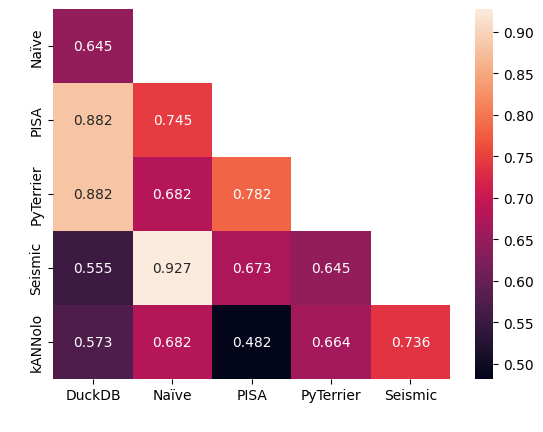

In [19]:
def plot(corr):
    import seaborn as sns
    fig = sns.heatmap(pairwise_correlations(corr).pivot(index=' ', columns='  ', values=corr), annot=True, fmt=".3f").get_figure()
    fig.savefig(f'efficiency-{corr}.pdf', bbox_inches='tight')

plot('spearman')

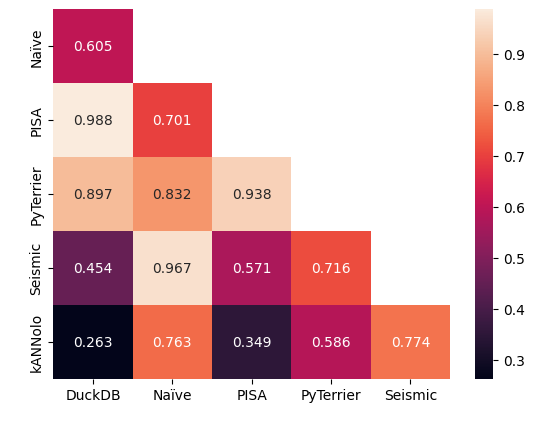

In [20]:
plot('pearson')

# Generate Evaluation DataFrame

The file `evaluation-in-progress.jsonl.gz` used below was created with `lsr-benchmark evaluate './*/*/*' -o evaluation-in-progress.jsonl.gz`. The results are intermediate, and these steps here slightly enrich the file `evaluation-in-progress.jsonl.gz` and remove datasets that do not yet have all approaches executed.

In [1]:
import pandas as pd
from lsr_benchmark.datasets import all_embeddings
from tira.rest_api_client import Client
import json

df = pd.read_json('evaluation-in-progress.jsonl.gz', lines=True)
df["Retrieval"] = df["approach"].apply(lambda i: i.split("/")[-1])
del df["approach"]
APPROACHES = ["duckdb", "naive-search", "pyterrier-splade", "pyterrier-splade-pisa", "seismic", "kannolo", "pyterrier-naive", "pyterrier-pisa"]
tira = Client()
d_stats = {}

for d, d_stat in json.loads(open('../lsr_benchmark/datasets/overview.json').read()).items():
    d_stats[d] = d_stat['dataset_stats']

In [2]:
def normalize_index_runtime(i):
    f = (d_stats[i["tira-dataset-id"]]["docs_count"]/1000)
    if f < 5:
        return None
    return int(i['index.runtime_wallclock'].split(' ')[0]) / f

def normalize_query_runtime(i):
    return int(i['retrieval.runtime_wallclock'].split(' ')[0]) / d_stats[i["tira-dataset-id"]]["queries_count"]

df['index_1000.runtime_wallclock'] = df.apply(normalize_index_runtime, axis=1)
df['retrieval_per_query.runtime_wallclock'] = df.apply(normalize_query_runtime, axis=1)

In [3]:
complete_datasets = set()

print(f"df complete: {len(df)}")

for dataset in df["ir-dataset-id"].unique():
    complete = True
    for approach in APPROACHES:
        if approach in ('pyterrier-naive', 'pyterrier-pisa') and len(df[(df["ir-dataset-id"] == dataset) & (df["Retrieval"] == approach)]) > 0:
            continue

        available_embeddings = df[(df["ir-dataset-id"] == dataset) & (df["Retrieval"] == approach)]["embedding/model"].unique()
        for e in all_embeddings():
            if e not in available_embeddings:
                complete = False
    if complete:
        complete_datasets.add(dataset)

df = df[df["ir-dataset-id"].isin(complete_datasets)]
print(f"df filtered: {len(df)}")

embedding_to_model = {}

for e in list(df["embedding/model"].unique()):
    if str(e) == "None":
        continue
    embedding_to_model[e] = tira.docker_software_details(f'lsr-benchmark/lightning-ir/{e}')['context']['command'].split('--model')[1].strip().split()[0]

df["embedding/model"] = df["embedding/model"].apply(lambda i: embedding_to_model.get(i))
df.to_json('results-in-progress.jsonl.gz', lines=True, orient="records")

df complete: 851
df filtered: 612
